# Exploratory Data Analysis

In [23]:
# Set Up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
# change working directory
os.chdir('/Users/gerardogutierrez/Desktop/Academics/Spring_2026/CS4620/Notebooks')

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame display

## Ambient Nutrient Data

In [24]:
# environmental data - night
environmental_data_night = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', header=2, usecols="A:H", nrows=119)

# environmental data - day
environmental_data_day = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', header=2, usecols="K:R", nrows=236)
# strip ".1" ferom column names
environmental_data_day.columns = environmental_data_day.columns.str.replace('.1', '', regex=False)

# combine night and day and sort by timestamp
environmental_data = pd.concat(
    [environmental_data_night, environmental_data_day],
    axis=0,
    ignore_index=True
)

environmental_data.sort_values("DateTime", inplace=True)
environmental_data.reset_index(drop=True, inplace=True)
environmental_data['DateTime'] = pd.to_datetime(environmental_data['DateTime'])

environmental_data

,DateTime,"Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)","BME280 (CH0, Temperature, °C)","BME280 (CH1, Humidity, %)","BME280 (CH2, Pressure, Pa)","BME280 (CH3, Dewpoint, °C)","BME280 (CH4, Altitude, m)","BME280 (CH5, Vapor Pressure Deficit, Pa)"
0,2025-10-14 01:25:06,450.0,21.69,69.39,98718.64,15.92,219.29,798.26
1,2025-10-14 03:22:52,443.0,21.70,69.51,98701.92,15.89,220.71,794.48
2,2025-10-14 05:20:38,442.0,21.77,69.71,98659.95,16.04,224.28,788.17
3,2025-10-14 07:18:24,447.0,23.04,58.17,98637.33,14.43,226.20,1183.76
4,2025-10-14 09:16:10,452.0,23.17,59.50,98682.71,15.00,222.34,1155.64
...,...,...,...,...,...,...,...,...
350,2025-11-11 15:23:26,455.0,23.99,71.27,99310.83,18.74,169.06,874.70
351,2025-11-11 17:21:12,461.0,23.43,61.49,99291.04,15.60,170.73,1107.73
352,2025-11-11 19:18:58,502.0,23.38,57.51,99348.25,14.85,165.89,1218.67
353,2025-11-11 21:16:44,526.0,22.80,60.08,99404.03,15.21,161.17,1178.20


In [25]:
environmental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   DateTime                                                   355 non-null    datetime64[ns]
 1   Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)  355 non-null    float64       
 2   BME280 (CH0, Temperature, °C)                              355 non-null    float64       
 3   BME280 (CH1, Humidity, %)                                  355 non-null    float64       
 4   BME280 (CH2, Pressure, Pa)                                 355 non-null    float64       
 5   BME280 (CH3, Dewpoint, °C)                                 355 non-null    float64       
 6   BME280 (CH4, Altitude, m)                                  355 non-null    float64       
 7   BME280 (CH5, Vapor Pressure Deficit,

In [26]:
# rename columns 
#  0   DateTime                                                   355 non-null    datetime64[ns]
#  1   Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)  355 non-null    float64       
#  2   BME280 (CH0, Temperature, °C)                              355 non-null    float64       
#  3   BME280 (CH1, Humidity, %)                                  355 non-null    float64       
#  4   BME280 (CH2, Pressure, Pa)                                 355 non-null    float64       
#  5   BME280 (CH3, Dewpoint, °C)                                 355 non-null    float64       
#  6   BME280 (CH4, Altitude, m)                                  355 non-null    float64       
#  7   BME280 (CH5, Vapor Pressure Deficit, Pa) 

environmental_data.rename(columns={
    'Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)': 'Carbon Dioxide',
    'BME280 (CH0, Temperature, °C)': 'Temperature',
    'BME280 (CH1, Humidity, %)': 'Humidity',
    'BME280 (CH2, Pressure, Pa)': 'Pressure',
    'BME280 (CH3, Dewpoint, °C)': 'Dewpoint',
    'BME280 (CH4, Altitude, m)': 'Altitude',
    'BME280 (CH5, Vapor Pressure Deficit, Pa)': 'Vapor Pressure Deficit'
}, inplace=True)

environmental_data.head()

,DateTime,Carbon Dioxide,Temperature,Humidity,Pressure,Dewpoint,Altitude,Vapor Pressure Deficit
0,2025-10-14 01:25:06,450.0,21.69,69.39,98718.64,15.92,219.29,798.26
1,2025-10-14 03:22:52,443.0,21.70,69.51,98701.92,15.89,220.71,794.48
2,2025-10-14 05:20:38,442.0,21.77,69.71,98659.95,16.04,224.28,788.17
3,2025-10-14 07:18:24,447.0,23.04,58.17,98637.33,14.43,226.20,1183.76
4,2025-10-14 09:16:10,452.0,23.17,59.50,98682.71,15.00,222.34,1155.64


In [27]:
# nutrient data sensor input 
nutrient_data_sensor = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', sheet_name='Nutrient Data', header=1, usecols = "A:I", nrows=355)

# drop specific gravity column 
nutrient_data_sensor.drop(columns=['Atlas EC (CH3, Specific Gravity)'], inplace=True)

# # knn impute missing values of ion concentration column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# use all columns except timestamp for imputation
nutrient_data_sensor = nutrient_data_sensor.copy()
nutrient_data_sensor.iloc[:, 1:] = imputer.fit_transform(nutrient_data_sensor.iloc[:, 1:])


nutrient_data_sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DateTime                                         355 non-null    object 
 1   Atlas pH (CH0, Ion Concentration, pH)            355 non-null    float64
 2   Atlas EC (CH0, Electrical Conductivity, μS/cm)   355 non-null    float64
 3   Atlas EC (CH1, Total Dissolved Solids, ppm)      355 non-null    float64
 4   Atlas EC (CH2, Salinity, ppt)                    355 non-null    float64
 5   Atlas Flow Meter (CH0, Volume, l)                355 non-null    float64
 6   Atlas PT-1000 (CH0, Temperature, °C)             355 non-null    float64
 7   Atlas Flow Meter (CH1, Volume Flow Rate, l/min)  355 non-null    float64
dtypes: float64(7), object(1)
memory usage: 22.3+ KB


In [28]:
# rename columns and convert timestamp to datetime
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 355 entries, 0 to 354
# Data columns (total 8 columns):
#  #   Column                                           Non-Null Count  Dtype  
# ---  ------                                           --------------  -----  
#  0   DateTime                                         355 non-null    object 
#  1   Atlas pH (CH0, Ion Concentration, pH)            355 non-null    float64
#  2   Atlas EC (CH0, Electrical Conductivity, μS/cm)   355 non-null    float64
#  3   Atlas EC (CH1, Total Dissolved Solids, ppm)      355 non-null    float64
#  4   Atlas EC (CH2, Salinity, ppt)                    355 non-null    float64
#  5   Atlas Flow Meter (CH0, Volume, l)                355 non-null    float64
#  6   Atlas PT-1000 (CH0, Temperature, °C)             355 non-null    float64
#  7   Atlas Flow Meter (CH1, Volume Flow Rate, l/min)  355 non-null    float64

nutrient_data_sensor.rename(columns={
    'Atlas pH (CH0, Ion Concentration, pH)': 'Ion Concentration',
    'Atlas EC (CH0, Electrical Conductivity, μS/cm)': 'Electrical Conductivity',
    'Atlas EC (CH1, Total Dissolved Solids, ppm)': 'Total Dissolved Solids',
    'Atlas EC (CH2, Salinity, ppt)': 'Salinity',
    'Atlas Flow Meter (CH0, Volume, l)': 'Volume',
    'Atlas PT-1000 (CH0, Temperature, °C)': 'Temperature',
    'Atlas Flow Meter (CH1, Volume Flow Rate, l/min)': 'Volume Flow Rate'
}, inplace=True)
nutrient_data_sensor['DateTime'] = pd.to_datetime(nutrient_data_sensor['DateTime'])
nutrient_data_sensor.head()

,DateTime,Ion Concentration,Electrical Conductivity,Total Dissolved Solids,Salinity,Volume,Temperature,Volume Flow Rate
0,2025-10-14 01:25:06,5.87,1281.5,692.0,0.64,259.585,23.4740,1.16
1,2025-10-14 03:22:52,5.89,1282.0,693.0,0.64,397.410,23.4280,1.16
2,2025-10-14 05:20:38,5.92,1282.0,693.0,0.64,534.035,23.3830,1.16
3,2025-10-14 07:18:24,5.93,1284.0,694.0,0.64,671.860,23.6310,1.16
4,2025-10-14 09:16:10,5.94,1294.0,699.0,0.64,801.315,23.8435,1.16


In [29]:
nutrient_data_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 355 non-null    datetime64[ns]
 1   Ion Concentration        355 non-null    float64       
 2   Electrical Conductivity  355 non-null    float64       
 3   Total Dissolved Solids   355 non-null    float64       
 4   Salinity                 355 non-null    float64       
 5   Volume                   355 non-null    float64       
 6   Temperature              355 non-null    float64       
 7   Volume Flow Rate         355 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.3 KB


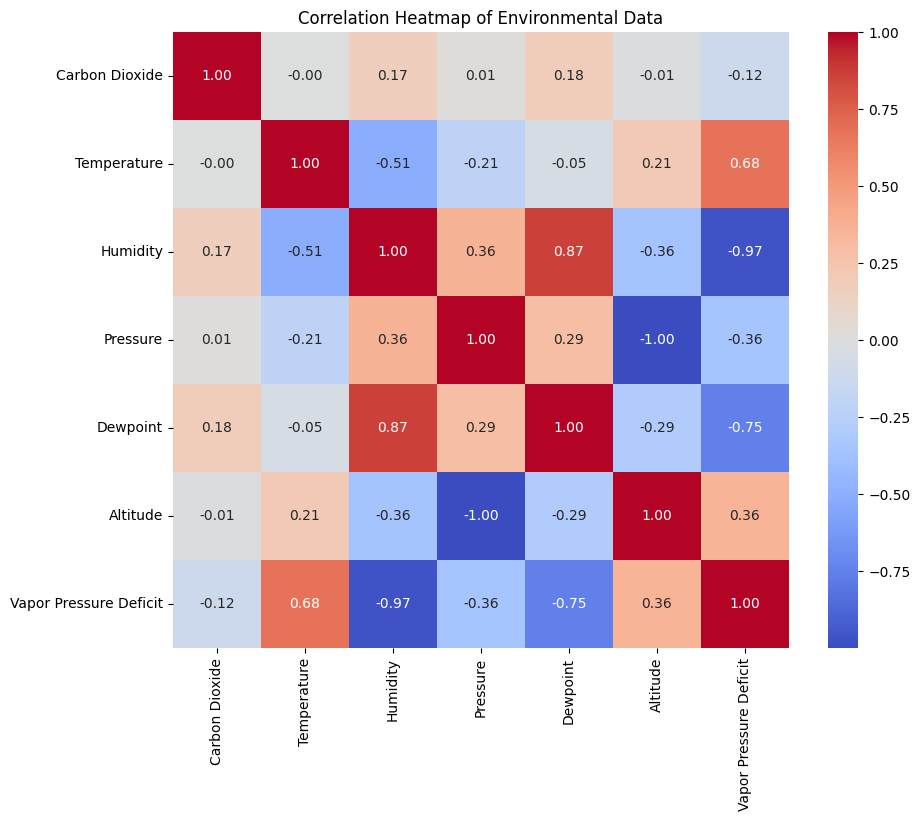

In [30]:
# correlation heatmap of enviornmental data
plt.figure(figsize=(10, 8))
correlation_matrix = environmental_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Environmental Data')
plt.show()

Dewpoint and Humidity are strongly correlated 
Vapor pressure deficit and humidity are strongly negatively correlated.

Drop vapor pressure deficit and dewpoint.

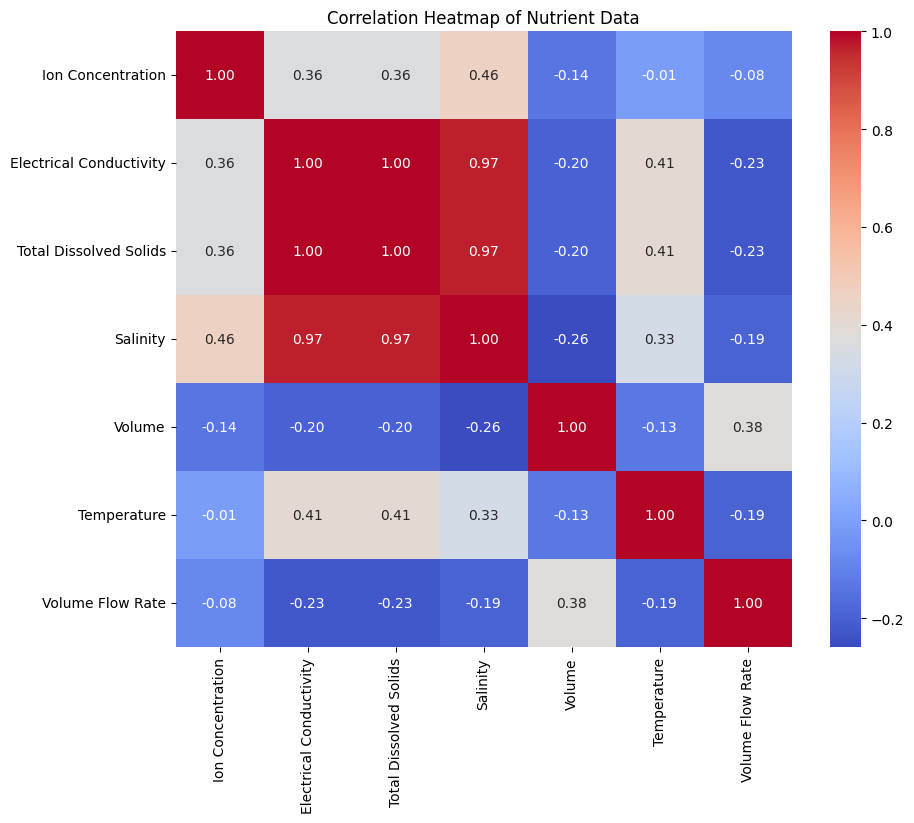

In [31]:
# correlation heatmap of nutrient data sensor

plt.figure(figsize=(10, 8))
correlation_matrix_nutrient = nutrient_data_sensor.select_dtypes(include=[np.number]).corr()
correlation_matrix_nutrient
sns.heatmap(correlation_matrix_nutrient, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Nutrient Data')
plt.show()

EC, salinity, and total dissolved solids are almost perfectly correlated. Drop salinity and total dissolved solids. 

**Aggregrate environmental data and nutrient data to match frequency of lettuce growth data.**


In [ ]:
######## environmental data 

def days_by_4(entry):
    if entry == 0:
        return 0
    elif entry in {1,2,3,4}:
        return 4
    elif entry in {5,6,7,8}:
        return 8
    elif entry in {9,10,11,12}:
        return 12
    elif entry in {13,14,15,16}:
        return 16
    elif entry in {17,18,19,20}:
        return 20
    elif entry in {21,22,23,24}:
        return 24
    elif entry in {25,26,27,28}:
        return 28

correlated_col_to_drop = ['Vapor Pressure Deficit', 'Dewpoint', 'Altitude']

env_df = environmental_data.copy()
day0_date = env_df['DateTime'].dt.floor('D').min()
env_df['Temp Days'] = (env_df['DateTime'].dt.floor('D') - day0_date).dt.days
env_df['Days'] = env_df['Temp Days'].apply(days_by_4)
env_df.drop(columns=['DateTime', 'Temp Days'], inplace=True)
env_df.drop(columns=correlated_col_to_drop, inplace=True)
env_df.head(30)

,Carbon Dioxide,Temperature,Humidity,Pressure,Altitude,Days
0,450.0,21.69,69.39,98718.64,219.29,0
1,443.0,21.70,69.51,98701.92,220.71,0
2,442.0,21.77,69.71,98659.95,224.28,0
3,447.0,23.04,58.17,98637.33,226.20,0
4,452.0,23.17,59.50,98682.71,222.34,0
5,459.0,22.96,58.68,98735.68,217.84,0
6,443.0,23.03,58.13,98852.73,207.89,0
7,445.0,23.06,59.19,98887.73,204.92,0
8,449.0,23.05,59.10,98926.89,201.59,0
9,460.0,23.06,59.11,99015.84,194.05,0


In [ ]:
correlated_col_to_drop = ['Ion Concentration','Salinity', 'Total Dissolved Solids']

nutr_df = nutrient_data_sensor.copy()
nutr_df['Temp Days'] = (nutr_df['DateTime'].dt.floor('D') - day0_date).dt.days
nutr_df['Days'] = nutr_df['Temp Days'].apply(days_by_4)
nutr_df.head(30)
nutr_df.drop(columns=['DateTime', 'Temp Days'], inplace=True)
nutr_df.drop(columns=correlated_col_to_drop, inplace=True)
nutr_df.head(30)

,Ion Concentration,Electrical Conductivity,Volume,Temperature,Volume Flow Rate,Days
0,5.87,1281.5,259.585,23.4740,1.16,0
1,5.89,1282.0,397.410,23.4280,1.16,0
2,5.92,1282.0,534.035,23.3830,1.16,0
3,5.93,1284.0,671.860,23.6310,1.16,0
4,5.94,1294.0,801.315,23.8435,1.16,0
5,5.94,1301.0,946.700,23.9620,1.16,0
6,5.96,1306.0,1053.550,23.9880,1.16,0
7,5.95,1318.0,1218.260,24.3375,1.16,0
8,5.96,1314.0,1355.410,24.1445,1.16,0
9,5.97,1317.0,1492.390,24.0980,1.16,0


In [34]:
# mean dataframe for environmental data 
mean_env_df = env_df.groupby('Days').mean().reset_index()

mean_env_df

,Days,Carbon Dioxide,Temperature,Humidity,Pressure,Altitude
0,0,461.250000,22.528333,62.394167,98838.439167,209.115000
1,4,487.000000,22.425714,62.214082,99060.374490,190.279184
2,8,514.051020,22.520816,65.247347,99282.511633,171.456531
3,12,503.693878,21.764694,62.327755,99235.894082,175.402245
4,16,496.816327,22.316327,53.725918,99111.638367,185.931224
5,20,532.357143,22.804490,52.372857,99187.103673,179.537755
6,24,500.326531,22.005102,67.333265,99373.720000,163.772857
7,28,511.530612,22.304286,71.859592,99342.587347,166.398980


In [35]:

# mean dataframe for nutrient data
mean_nutr_df = nutr_df.groupby('Days').mean().reset_index()

mean_nutr_df



,Days,Ion Concentration,Electrical Conductivity,Volume,Temperature,Volume Flow Rate
0,0,5.937500,1300.625000,1010.277917,23.835208,1.160000
1,4,6.008163,1361.010204,5132.698163,23.987102,1.157143
2,8,5.935306,1521.816327,11551.277959,25.308837,1.087551
3,12,5.977755,1551.622449,17751.971224,24.544541,1.087143
4,16,6.039592,1699.387755,24206.932143,25.323561,1.159184
5,20,6.202041,1668.877551,19444.102449,23.349337,1.154388
6,24,6.161020,2112.959184,2358.132449,25.973663,1.082041
7,28,6.124490,1943.295918,550.176327,26.928286,0.213673


In [36]:
lettuce_weights = pd.read_excel('../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx', sheet_name='Targets', header=26, usecols="A:D", nrows=9)
lettuce_weights['Change in Fresh Weight'] = lettuce_weights['Median Net Fresh Weight'].diff().fillna(0)
lettuce_weights

,Date,Day,Median Net Fresh Weight,Target Fresh Weight,Change in Fresh Weight
0,NaN,0,4.7,3.5,0.0
1,NaN,4,13.1,8.8,8.4
2,NaN,8,19.8,22.2,6.7
3,NaN,12,27.3,56.0,7.5
4,NaN,16,42.3,98.8,15.0
5,NaN,20,80.8,141.5,38.5
6,NaN,24,139.3,184.3,58.5
7,NaN,28,219.8,227.0,80.5


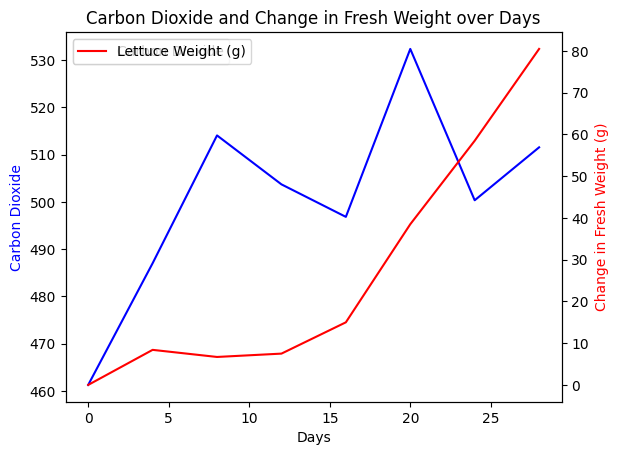

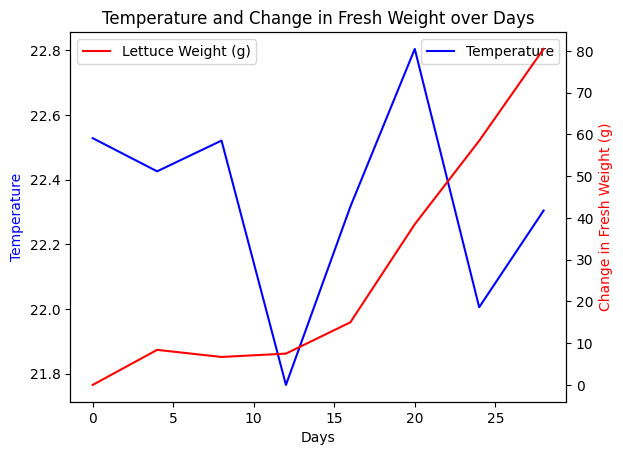

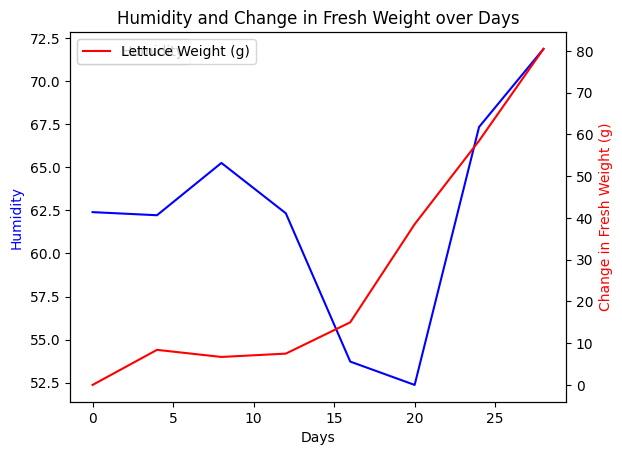

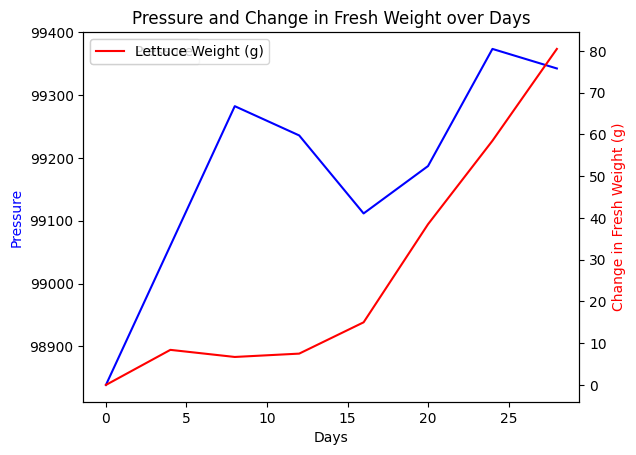

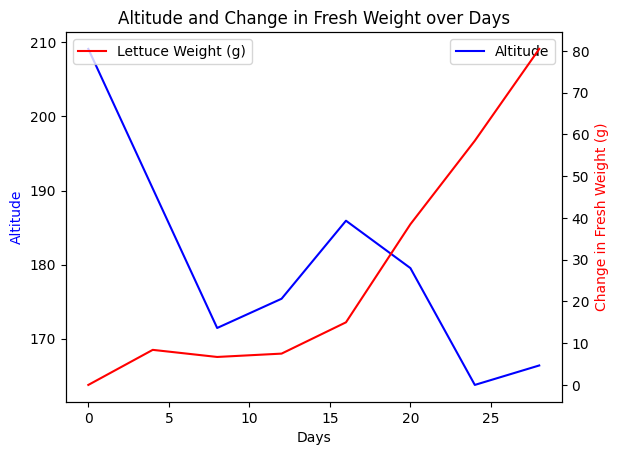

In [37]:

# plot separate line plots for each column in env_df against days
for column in mean_env_df.columns:
    if column != 'Days':

        # plot lettuce growth against days with another y axis 
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        sns.lineplot(x=mean_env_df['Days'], y=mean_env_df[column], ax=ax1, color='b', label=column)
        sns.lineplot(x=lettuce_weights['Day'], y=lettuce_weights['Change in Fresh Weight'], ax=ax2, color='r', label='Lettuce Weight (g)')
        ax1.set_xlabel('Days')
        ax1.set_ylabel(column, color='b')
        ax2.set_ylabel('Change in Fresh Weight (g)', color='r')
        plt.title(f'{column} and Change in Fresh Weight over Days')
        plt.show()

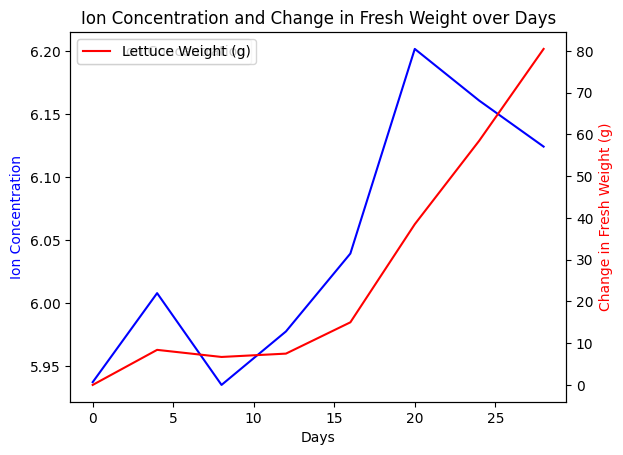

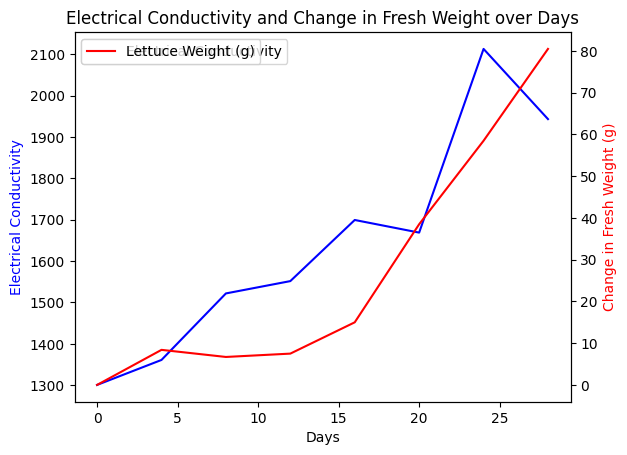

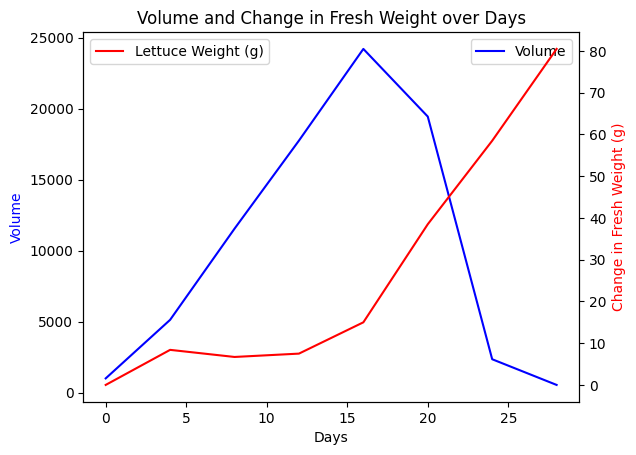

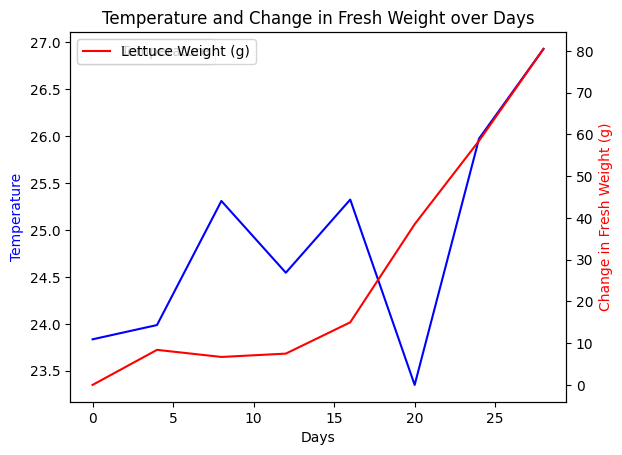

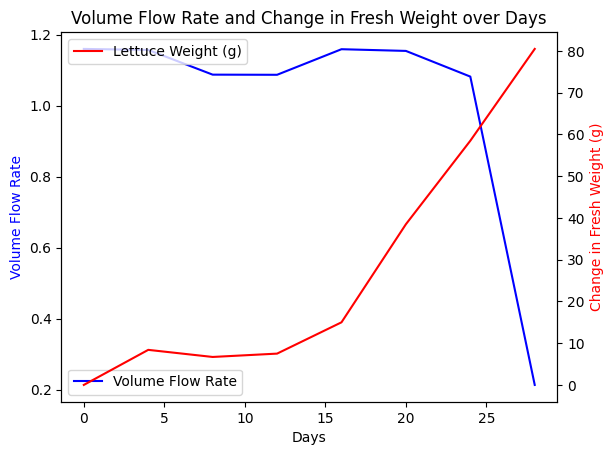

In [38]:
# plot separate line plots for each column in nutr_df against days
for column in mean_nutr_df.columns:
    if column != 'Days':

        # plot lettuce growth against days with another y axis 
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        sns.lineplot(x=mean_nutr_df['Days'], y=mean_nutr_df[column], ax=ax1, color='b', label=column)
        sns.lineplot(x=lettuce_weights['Day'], y=lettuce_weights['Change in Fresh Weight'], ax=ax2, color='r', label='Lettuce Weight (g)')
        ax1.set_xlabel('Days')
        ax1.set_ylabel(column, color='b')
        ax2.set_ylabel('Change in Fresh Weight (g)', color='r')
        plt.title(f'{column} and Change in Fresh Weight over Days')
        plt.show()

## Lettuce Growth Data

In [39]:
lettuce_data_collection = pd.read_excel('../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx', sheet_name='Data_Collection', header=0, usecols="A:H")
lettuce_data_collection.dropna(how='all', inplace=True)
lettuce_data_collection


,Date,Day,Plant-ID,Total Fresh Weight (g),Baseline (g),New Fresh Weight (g),Median Fresh Weight (g),Average Fresh Weight (g)
0,NaN,0.0,6.0,29.1,25.22,3.88,NaN,NaN
1,NaN,0.0,4.0,29.3,25.22,4.08,NaN,NaN
2,NaN,0.0,9.0,29.6,25.22,4.38,NaN,NaN
3,NaN,0.0,1.0,29.7,25.22,4.48,NaN,NaN
4,NaN,0.0,8.0,29.8,25.22,4.58,NaN,NaN
...,...,...,...,...,...,...,...,...
82,NaN,28.0,10.0,246.0,25.22,220.78,219.78,214.38
83,NaN,28.0,4.0,246.0,25.22,220.78,NaN,NaN
84,NaN,28.0,9.0,248.0,25.22,222.78,NaN,NaN
85,NaN,28.0,2.0,243.0,25.22,217.78,NaN,NaN


In [40]:
# target
target_weights = pd.read_excel('../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx', sheet_name='Targets', header=0, usecols="A:D", nrows=9)
target_weights

,Targets Days.,FW_Target_Mid_g,FW_Target_Low_g,FW_Target_High_g
0,0,3.5,3.0,4.0
1,4,8.8,7.5,10.1
2,8,22.2,18.9,25.5
3,12,56.0,47.6,64.4
4,16,98.8,88.9,108.6
5,20,141.5,127.4,155.7
6,24,184.3,165.8,202.7
7,28,227.0,211.1,242.9


In [57]:
# actual weights - median values from data collection
lettuce_weights = pd.read_excel('../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx', sheet_name='Targets', header=26, usecols="A:D", nrows=9)
lettuce_weights['Change in Fresh Weight'] = lettuce_weights['Median Net Fresh Weight'].diff().fillna(0)
lettuce_weights

,Date,Day,Median Net Fresh Weight,Target Fresh Weight,Change in Fresh Weight
0,NaN,0,4.7,3.5,0.0
1,NaN,4,13.1,8.8,8.4
2,NaN,8,19.8,22.2,6.7
3,NaN,12,27.3,56.0,7.5
4,NaN,16,42.3,98.8,15.0
5,NaN,20,80.8,141.5,38.5
6,NaN,24,139.3,184.3,58.5
7,NaN,28,219.8,227.0,80.5


# Analysis 

In [42]:
# environmental data columns

#Index(['DateTime', 'Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)',
#        'BME280 (CH0, Temperature, °C)', 'BME280 (CH1, Humidity, %)',
#        'BME280 (CH2, Pressure, Pa)', 'BME280 (CH3, Dewpoint, °C)',
#        'BME280 (CH4, Altitude, m)',
#        'BME280 (CH5, Vapor Pressure Deficit, Pa)'],
#       dtype='object')

environmental_data

,DateTime,Carbon Dioxide,Temperature,Humidity,Pressure,Dewpoint,Altitude,Vapor Pressure Deficit
0,2025-10-14 01:25:06,450.0,21.69,69.39,98718.64,15.92,219.29,798.26
1,2025-10-14 03:22:52,443.0,21.70,69.51,98701.92,15.89,220.71,794.48
2,2025-10-14 05:20:38,442.0,21.77,69.71,98659.95,16.04,224.28,788.17
3,2025-10-14 07:18:24,447.0,23.04,58.17,98637.33,14.43,226.20,1183.76
4,2025-10-14 09:16:10,452.0,23.17,59.50,98682.71,15.00,222.34,1155.64
...,...,...,...,...,...,...,...,...
350,2025-11-11 15:23:26,455.0,23.99,71.27,99310.83,18.74,169.06,874.70
351,2025-11-11 17:21:12,461.0,23.43,61.49,99291.04,15.60,170.73,1107.73
352,2025-11-11 19:18:58,502.0,23.38,57.51,99348.25,14.85,165.89,1218.67
353,2025-11-11 21:16:44,526.0,22.80,60.08,99404.03,15.21,161.17,1178.20


In [43]:
environmental_data.plot(
    x="DateTime",
    y=[
        "Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)",
        "BME280 (CH0, Temperature, °C)",
        "BME280 (CH1, Humidity, %)",
        "BME280 (CH2, Pressure, Pa)",
        "BME280 (CH3, Dewpoint, °C)",
        "BME280 (CH4, Altitude, m)",
        "BME280 (CH5, Vapor Pressure Deficit, Pa)"
    ],
    subplots=True,
    figsize=(14,20),
    title="Environmental Conditions Over Time"
)


KeyError: "None of [Index(['Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)',\n       'BME280 (CH0, Temperature, °C)', 'BME280 (CH1, Humidity, %)',\n       'BME280 (CH2, Pressure, Pa)', 'BME280 (CH3, Dewpoint, °C)',\n       'BME280 (CH4, Altitude, m)',\n       'BME280 (CH5, Vapor Pressure Deficit, Pa)'],\n      dtype='object')] are in the [columns]"

In [44]:
# lettuce columns
# Index(['Date', 'Day', 'Plant-ID', 'Total Fresh Weight (g)', 'Baseline (g)',
#        'New Fresh Weight (g)', 'Median Fresh Weight (g)',
#        'Average Fresh Weight (g)'],
#       dtype='object')

lettuce_data_collection

,Date,Day,Plant-ID,Total Fresh Weight (g),Baseline (g),New Fresh Weight (g),Median Fresh Weight (g),Average Fresh Weight (g)
0,NaN,0.0,6.0,29.1,25.22,3.88,NaN,NaN
1,NaN,0.0,4.0,29.3,25.22,4.08,NaN,NaN
2,NaN,0.0,9.0,29.6,25.22,4.38,NaN,NaN
3,NaN,0.0,1.0,29.7,25.22,4.48,NaN,NaN
4,NaN,0.0,8.0,29.8,25.22,4.58,NaN,NaN
...,...,...,...,...,...,...,...,...
82,NaN,28.0,10.0,246.0,25.22,220.78,219.78,214.38
83,NaN,28.0,4.0,246.0,25.22,220.78,NaN,NaN
84,NaN,28.0,9.0,248.0,25.22,222.78,NaN,NaN
85,NaN,28.0,2.0,243.0,25.22,217.78,NaN,NaN


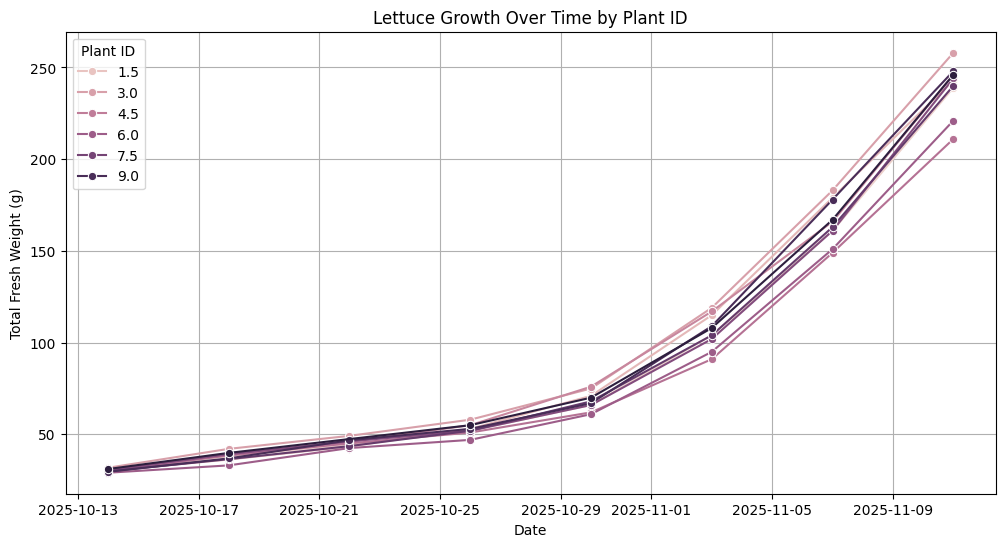

In [45]:
#plot lettuce growth over time 

#use Days column  to fill DateTime column using October 14th as say 0 and October 18th as day 4 and so on 
lettuce_data_collection['Date'] = pd.to_datetime('2025-10-14') + pd.to_timedelta(lettuce_data_collection['Day'], unit='D')
lettuce_data_collection

# plot per plant-id growth over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=lettuce_data_collection, x='Date', y='Total Fresh Weight (g)', hue='Plant-ID', marker='o')
plt.title('Lettuce Growth Over Time by Plant ID')
plt.xlabel('Date')
plt.ylabel('Total Fresh Weight (g)')
plt.legend(title='Plant ID')
plt.grid()
plt.show()

In [46]:
# plant id unique values
lettuce_data_collection['Plant-ID'].unique()

array([ 6.,  4.,  9.,  1.,  8.,  2.,  5.,  7., 10.,  3.])

Ideas

* plot rolling aggregrares (e.g. mean) over time to see trends 
* arch model if volatility
* var model for multivariate 
* 


# Regression Model 


mean_nutr_df

In [47]:
mean_nutr_df

,Days,Ion Concentration,Electrical Conductivity,Volume,Temperature,Volume Flow Rate
0,0,5.937500,1300.625000,1010.277917,23.835208,1.160000
1,4,6.008163,1361.010204,5132.698163,23.987102,1.157143
2,8,5.935306,1521.816327,11551.277959,25.308837,1.087551
3,12,5.977755,1551.622449,17751.971224,24.544541,1.087143
4,16,6.039592,1699.387755,24206.932143,25.323561,1.159184
5,20,6.202041,1668.877551,19444.102449,23.349337,1.154388
6,24,6.161020,2112.959184,2358.132449,25.973663,1.082041
7,28,6.124490,1943.295918,550.176327,26.928286,0.213673


In [48]:
# concatenate mean_env_df and mean_nutr_df on 'Days' column
mean_df = pd.merge(mean_env_df, mean_nutr_df, on='Days')
mean_df

,Days,Carbon Dioxide,Temperature_x,Humidity,Pressure,Altitude,Ion Concentration,Electrical Conductivity,Volume,Temperature_y,Volume Flow Rate
0,0,461.250000,22.528333,62.394167,98838.439167,209.115000,5.937500,1300.625000,1010.277917,23.835208,1.160000
1,4,487.000000,22.425714,62.214082,99060.374490,190.279184,6.008163,1361.010204,5132.698163,23.987102,1.157143
2,8,514.051020,22.520816,65.247347,99282.511633,171.456531,5.935306,1521.816327,11551.277959,25.308837,1.087551
3,12,503.693878,21.764694,62.327755,99235.894082,175.402245,5.977755,1551.622449,17751.971224,24.544541,1.087143
4,16,496.816327,22.316327,53.725918,99111.638367,185.931224,6.039592,1699.387755,24206.932143,25.323561,1.159184
5,20,532.357143,22.804490,52.372857,99187.103673,179.537755,6.202041,1668.877551,19444.102449,23.349337,1.154388
6,24,500.326531,22.005102,67.333265,99373.720000,163.772857,6.161020,2112.959184,2358.132449,25.973663,1.082041
7,28,511.530612,22.304286,71.859592,99342.587347,166.398980,6.124490,1943.295918,550.176327,26.928286,0.213673


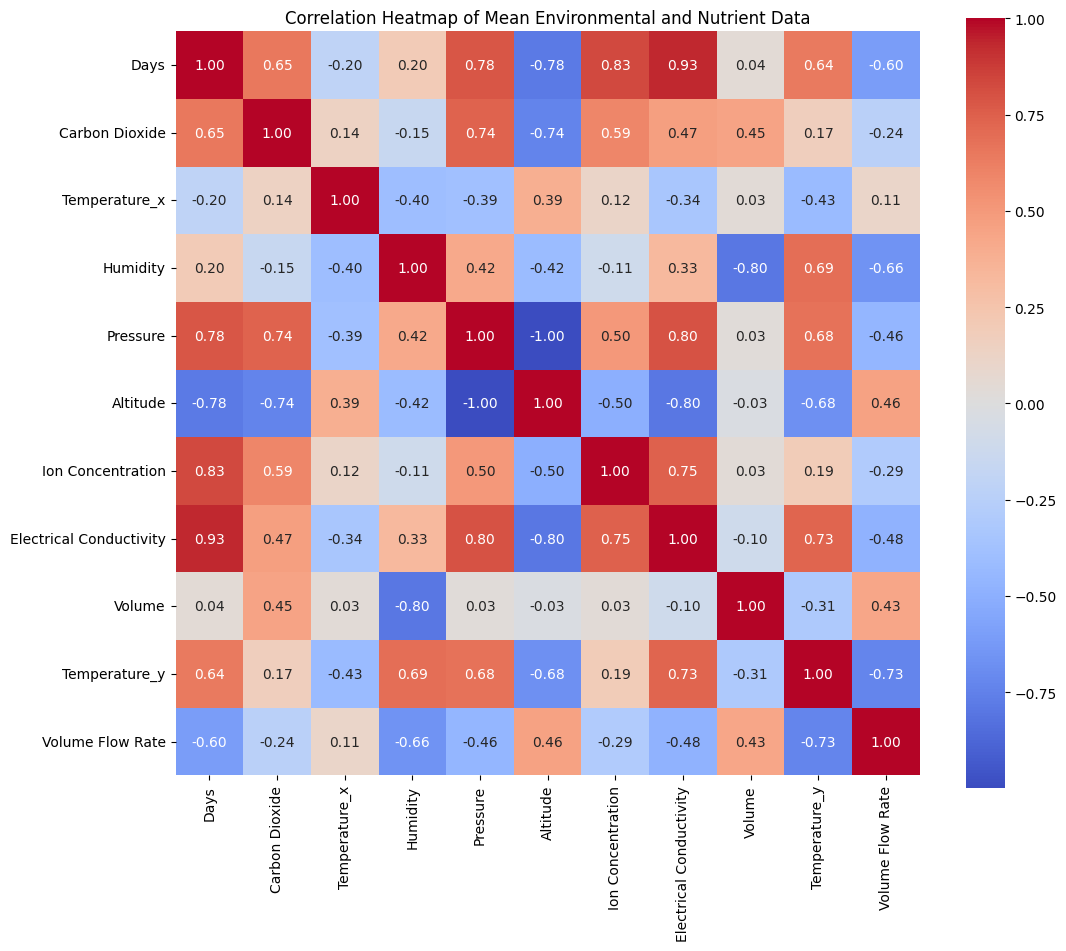

In [49]:
# correlation heatmap of mean_df
plt.figure(figsize=(12, 10))
correlation_matrix_mean = mean_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix_mean, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Mean Environmental and Nutrient Data')
plt.show()

In [58]:


reg_df = mean_df.copy()
reg_df['Change in Fresh Weight'] = lettuce_weights['Change in Fresh Weight']
reg_df

,Days,Carbon Dioxide,Temperature_x,Humidity,Pressure,Altitude,Ion Concentration,Electrical Conductivity,Volume,Temperature_y,Volume Flow Rate,Change in Fresh Weight
0,0,461.250000,22.528333,62.394167,98838.439167,209.115000,5.937500,1300.625000,1010.277917,23.835208,1.160000,0.0
1,4,487.000000,22.425714,62.214082,99060.374490,190.279184,6.008163,1361.010204,5132.698163,23.987102,1.157143,8.4
2,8,514.051020,22.520816,65.247347,99282.511633,171.456531,5.935306,1521.816327,11551.277959,25.308837,1.087551,6.7
3,12,503.693878,21.764694,62.327755,99235.894082,175.402245,5.977755,1551.622449,17751.971224,24.544541,1.087143,7.5
4,16,496.816327,22.316327,53.725918,99111.638367,185.931224,6.039592,1699.387755,24206.932143,25.323561,1.159184,15.0
5,20,532.357143,22.804490,52.372857,99187.103673,179.537755,6.202041,1668.877551,19444.102449,23.349337,1.154388,38.5
6,24,500.326531,22.005102,67.333265,99373.720000,163.772857,6.161020,2112.959184,2358.132449,25.973663,1.082041,58.5
7,28,511.530612,22.304286,71.859592,99342.587347,166.398980,6.124490,1943.295918,550.176327,26.928286,0.213673,80.5


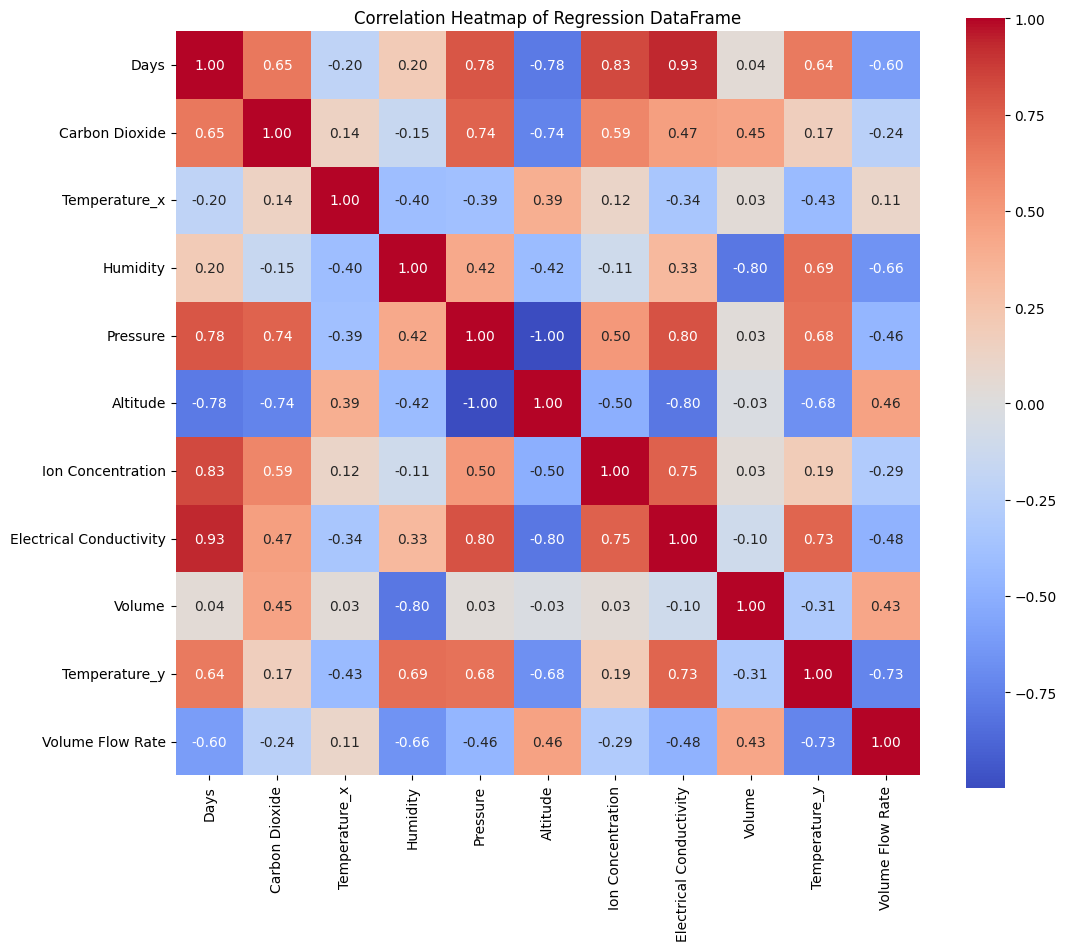

In [51]:
# heatmap of reg_df
plt.figure(figsize=(12, 10))
correlation_matrix_reg = reg_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix_reg, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Regression DataFrame')
plt.show()

In [52]:
# linear regression model 

ind_cols = ['Electrical Conductivity'] # variables to include in regression model

import statsmodels.api as sm
X = reg_df[ind_cols]
y = reg_df['Change in Fresh Weight']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()
predictions = model.predict(X)  
model.summary()


KeyError: 'Change in Fresh Weight'

In [ ]:
predictions

0   -5.191217e-13
1    8.400000e+00
2    6.700000e+00
3    7.500000e+00
4    1.500000e+01
5    3.850000e+01
6    5.850000e+01
7    8.050000e+01
dtype: float64

# Cross Correlation

In [65]:
mean_env_df

,Days,Carbon Dioxide,Temperature,Humidity,Pressure,Altitude
0,0,461.250000,22.528333,62.394167,98838.439167,209.115000
1,4,487.000000,22.425714,62.214082,99060.374490,190.279184
2,8,514.051020,22.520816,65.247347,99282.511633,171.456531
3,12,503.693878,21.764694,62.327755,99235.894082,175.402245
4,16,496.816327,22.316327,53.725918,99111.638367,185.931224
5,20,532.357143,22.804490,52.372857,99187.103673,179.537755
6,24,500.326531,22.005102,67.333265,99373.720000,163.772857
7,28,511.530612,22.304286,71.859592,99342.587347,166.398980


In [56]:
mean_df

,Days,Carbon Dioxide,Temperature_x,Humidity,Pressure,Altitude,Ion Concentration,Electrical Conductivity,Volume,Temperature_y,Volume Flow Rate
0,0,461.250000,22.528333,62.394167,98838.439167,209.115000,5.937500,1300.625000,1010.277917,23.835208,1.160000
1,4,487.000000,22.425714,62.214082,99060.374490,190.279184,6.008163,1361.010204,5132.698163,23.987102,1.157143
2,8,514.051020,22.520816,65.247347,99282.511633,171.456531,5.935306,1521.816327,11551.277959,25.308837,1.087551
3,12,503.693878,21.764694,62.327755,99235.894082,175.402245,5.977755,1551.622449,17751.971224,24.544541,1.087143
4,16,496.816327,22.316327,53.725918,99111.638367,185.931224,6.039592,1699.387755,24206.932143,25.323561,1.159184
5,20,532.357143,22.804490,52.372857,99187.103673,179.537755,6.202041,1668.877551,19444.102449,23.349337,1.154388
6,24,500.326531,22.005102,67.333265,99373.720000,163.772857,6.161020,2112.959184,2358.132449,25.973663,1.082041
7,28,511.530612,22.304286,71.859592,99342.587347,166.398980,6.124490,1943.295918,550.176327,26.928286,0.213673


In [59]:
lettuce_weights

,Date,Day,Median Net Fresh Weight,Target Fresh Weight,Change in Fresh Weight
0,NaN,0,4.7,3.5,0.0
1,NaN,4,13.1,8.8,8.4
2,NaN,8,19.8,22.2,6.7
3,NaN,12,27.3,56.0,7.5
4,NaN,16,42.3,98.8,15.0
5,NaN,20,80.8,141.5,38.5
6,NaN,24,139.3,184.3,58.5
7,NaN,28,219.8,227.0,80.5


In [54]:
mean_nutr_df

,Days,Ion Concentration,Electrical Conductivity,Volume,Temperature,Volume Flow Rate
0,0,5.937500,1300.625000,1010.277917,23.835208,1.160000
1,4,6.008163,1361.010204,5132.698163,23.987102,1.157143
2,8,5.935306,1521.816327,11551.277959,25.308837,1.087551
3,12,5.977755,1551.622449,17751.971224,24.544541,1.087143
4,16,6.039592,1699.387755,24206.932143,25.323561,1.159184
5,20,6.202041,1668.877551,19444.102449,23.349337,1.154388
6,24,6.161020,2112.959184,2358.132449,25.973663,1.082041
7,28,6.124490,1943.295918,550.176327,26.928286,0.213673


In [64]:
cross_c = ccf(mean_nutr_df['Electrical Conductivity'], lettuce_weights['Change in Fresh Weight'])
cross_c[:10]

array([ 0.86924347,  0.51103188,  0.03235908, -0.32776305, -0.60529493,
       -0.72137011, -1.27847653, -1.1332678 ])

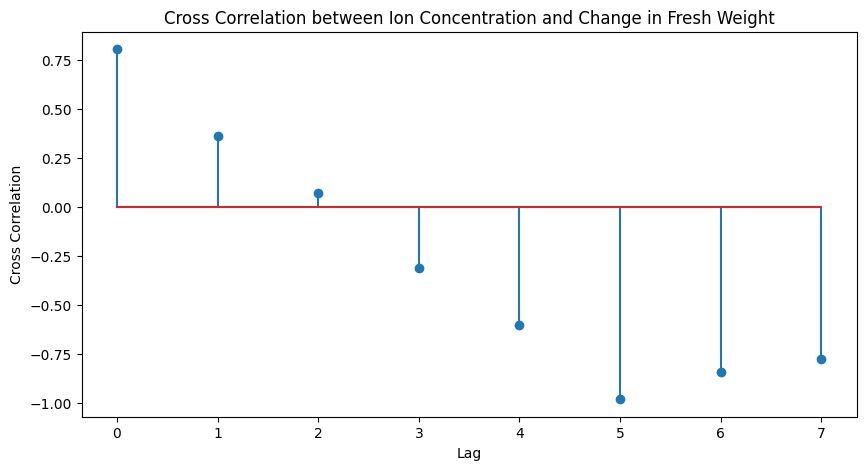

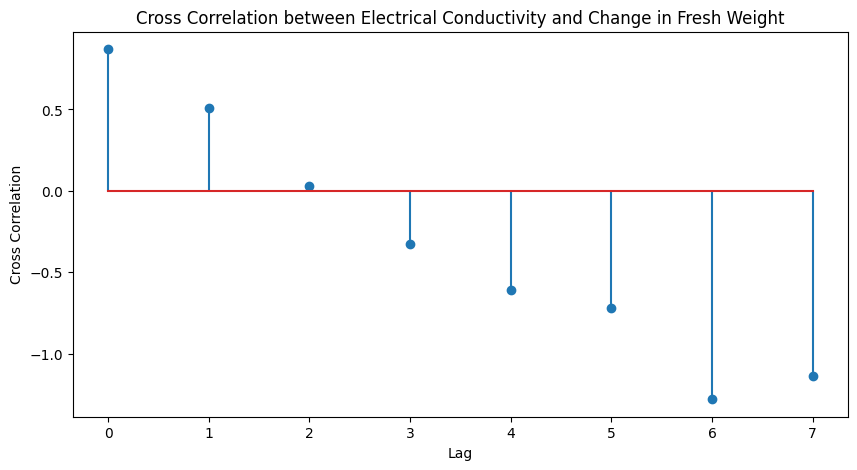

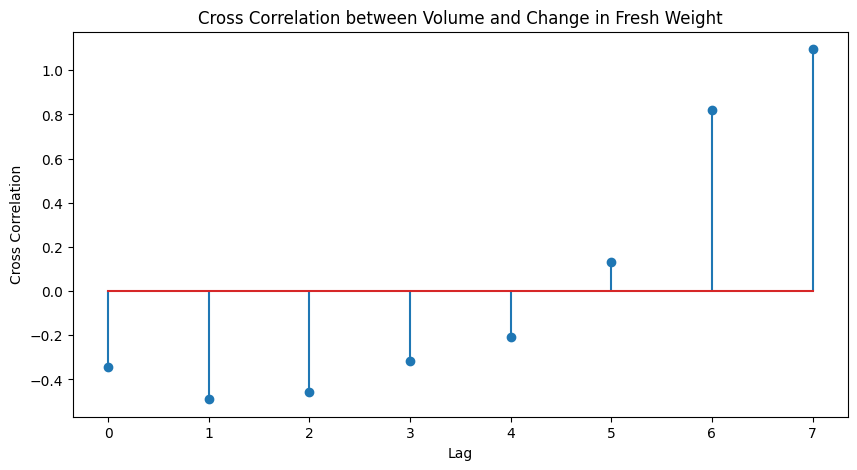

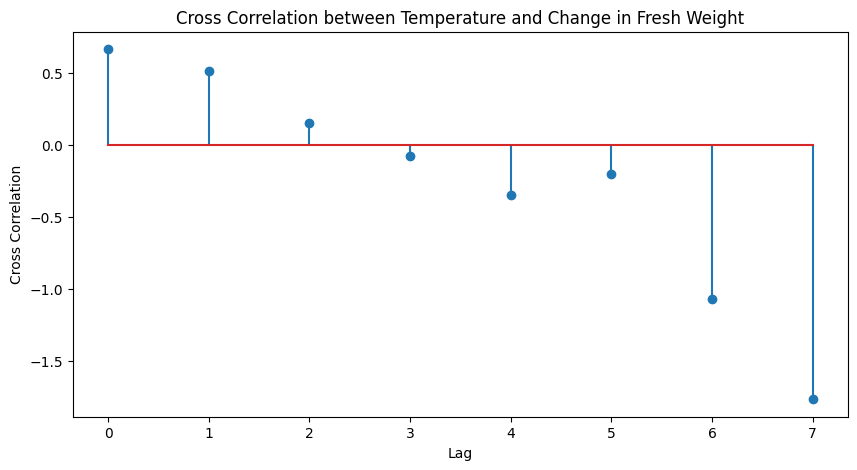

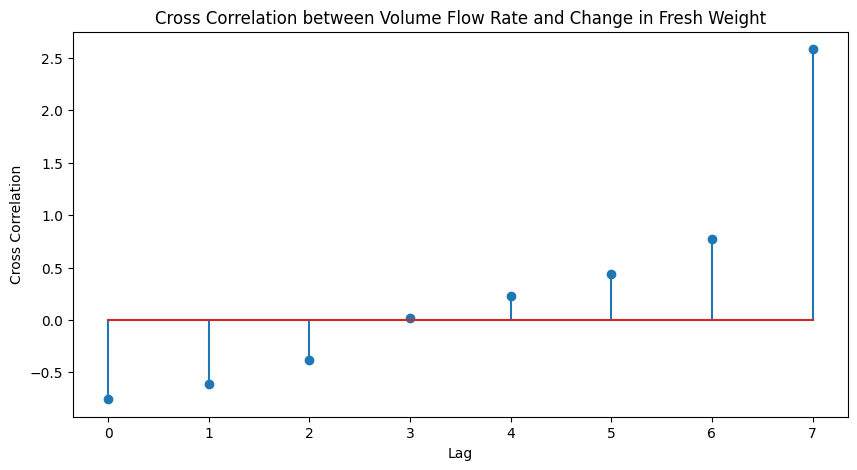

In [ ]:
# cross correlation between each nutrient and growth rate at different lags
from statsmodels.tsa.stattools import ccf
for col in mean_nutr_df.columns:
    if col != 'Days':
        cross_corr = ccf(mean_nutr_df[col], lettuce_weights['Change in Fresh Weight'])
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(cross_corr)), cross_corr)
        plt.title(f'Cross Correlation between {col} and Change in Fresh Weight')
        plt.xlabel('Lag')
        plt.ylabel('Cross Correlation')
        plt.show() 


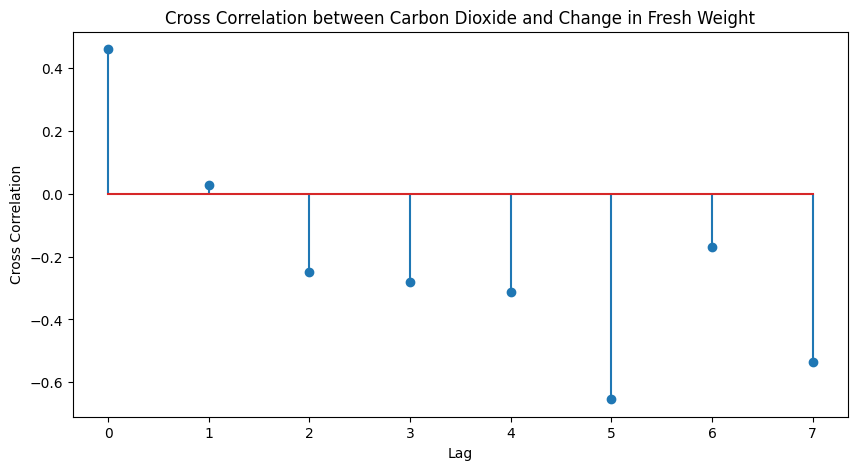

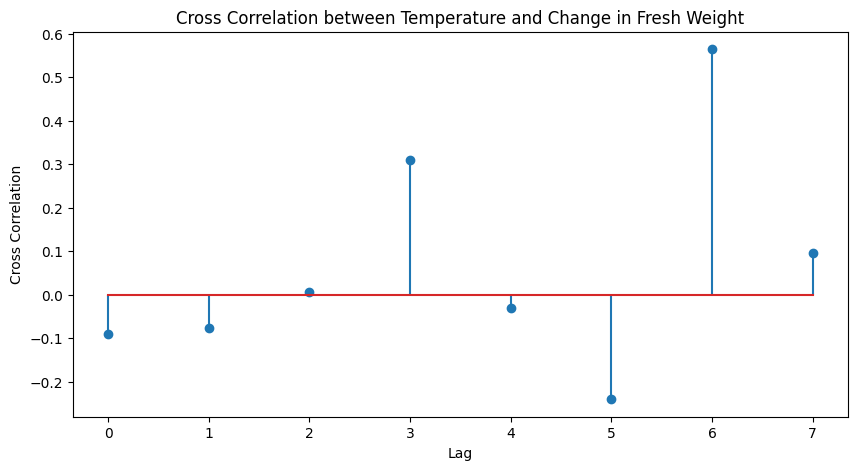

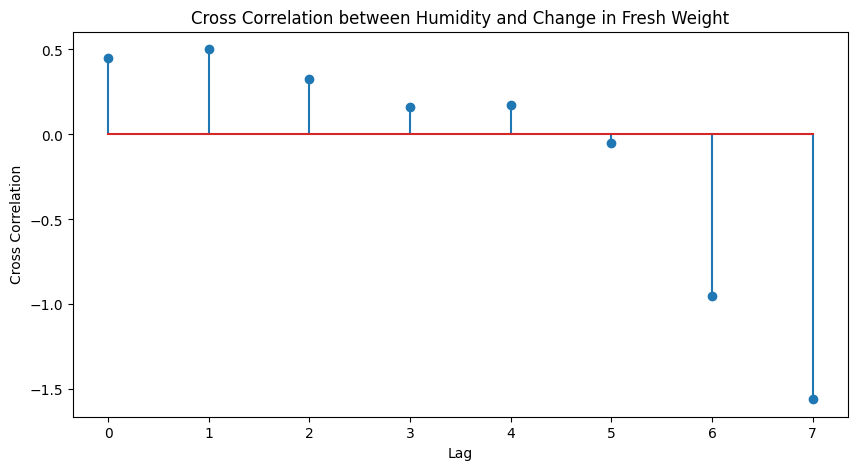

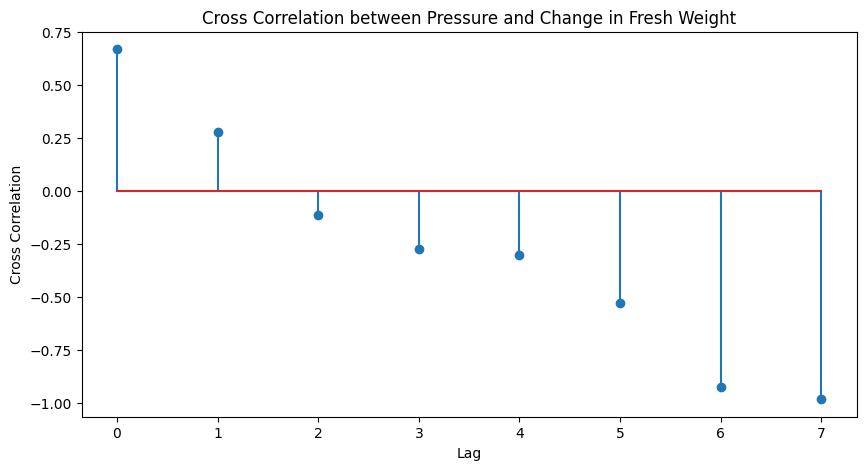

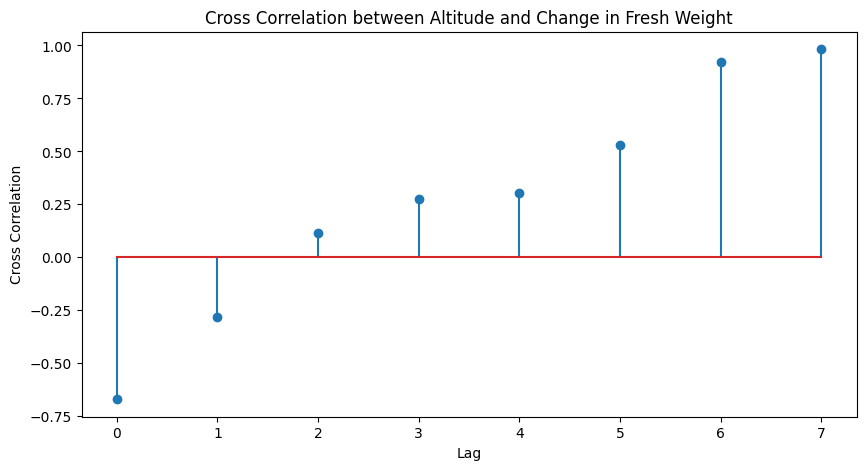

In [66]:
# cross correlation for mean_env_df and growth rate
for col in mean_env_df.columns:
    if col != 'Days':
        cross_corr = ccf(mean_env_df[col], lettuce_weights['Change in Fresh Weight'])
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(cross_corr)), cross_corr)
        plt.title(f'Cross Correlation between {col} and Change in Fresh Weight')
        plt.xlabel('Lag')
        plt.ylabel('Cross Correlation')
        plt.show()

# Trends in Data